---
---
---
# ARTIFICIAL NEURAL NETWORKS (ANN)
---
---
---

---
---
# ANN İLE RAKAM TANIMA
---
---

---
1-) Business Problem (İş Problemi)

2-) Data Understanding (Veriyi Anlamak)

3-) Data Preparation (Veriyi Hazırlamak)

4-) Modelling (Modelleme)

5-) Evalation (Değerlendirme)

6-) Saving Model and Using it to Predict (Modelin Kaydedilmesi ve Tahmin İçin Kullanılması)

---

1-) Business Problem (İş Problemi)

![ANN Number Guess Example photo](ANN_number_guess.png)

2-) Data Understanding (Veriyi Anlamak)

In [1]:
# Gerekli Kütüphaneler

import tensorflow              as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models   import load_model, Sequential
from tensorflow.keras.layers   import Dense, Flatten
from tensorflow.keras.utils    import to_categorical, plot_model

import matplotlib.pyplot       as plt
import numpy                   as np

import warnings
from warnings                  import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

In [2]:
# Mnist veri setinin yüklenmesi
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print("Eğitim Seti Boyutu:",X_train.shape, Y_train.shape)
print("Test   Seti Boyutu:",X_test.shape, Y_test.shape)
print("Farklı Çıktı Sayısı:", np.unique(Y_train))

Eğitim Seti Boyutu: (60000, 28, 28) (60000,)
Test   Seti Boyutu: (10000, 28, 28) (10000,)
Farklı Çıktı Sayısı: [0 1 2 3 4 5 6 7 8 9]


In [4]:
num_labels = len(np.unique(Y_train))
num_labels

10

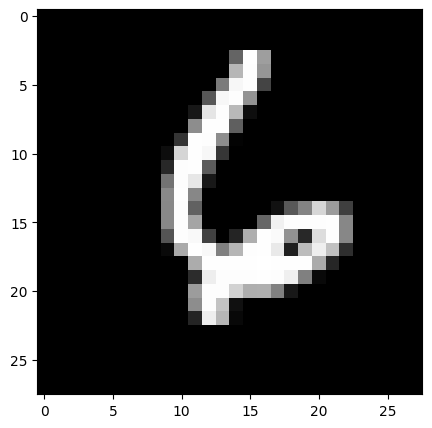

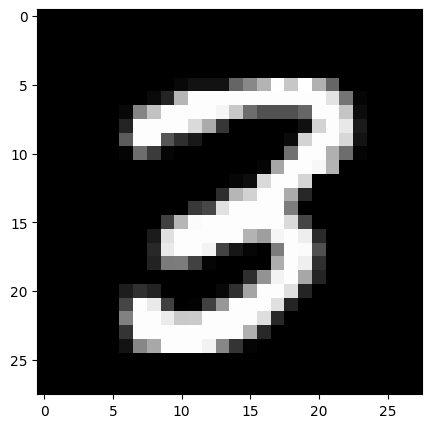

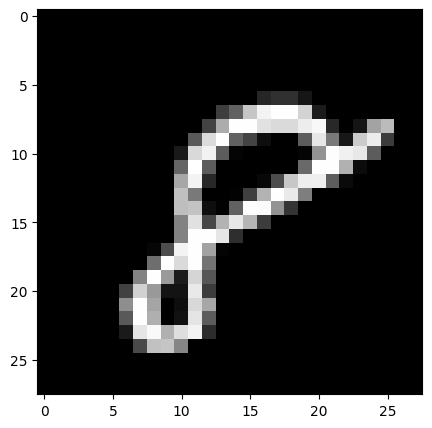

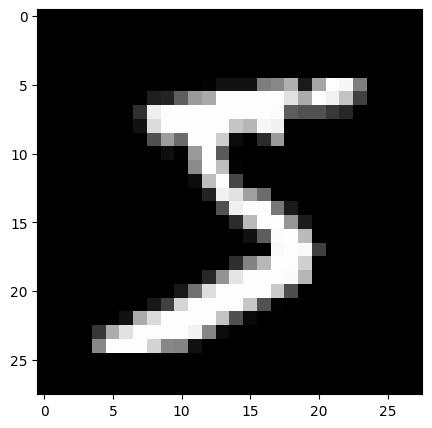

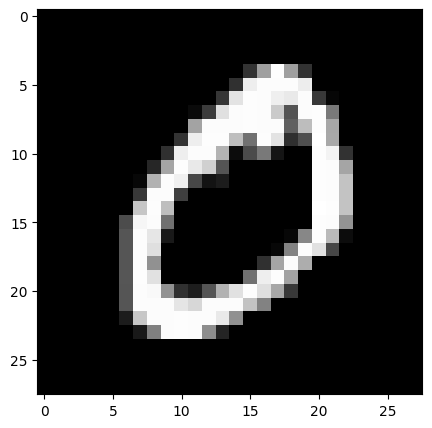

In [5]:
# Veri Setinden Örnekler Gösterilmesi

plt.figure(figsize=(5,5))
plt.imshow(X_train[59000], cmap="gray");
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(X_train[59001], cmap="gray");
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(X_train[59999], cmap="gray");
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(X_train[0], cmap="gray");
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(X_train[1], cmap="gray");
plt.show()

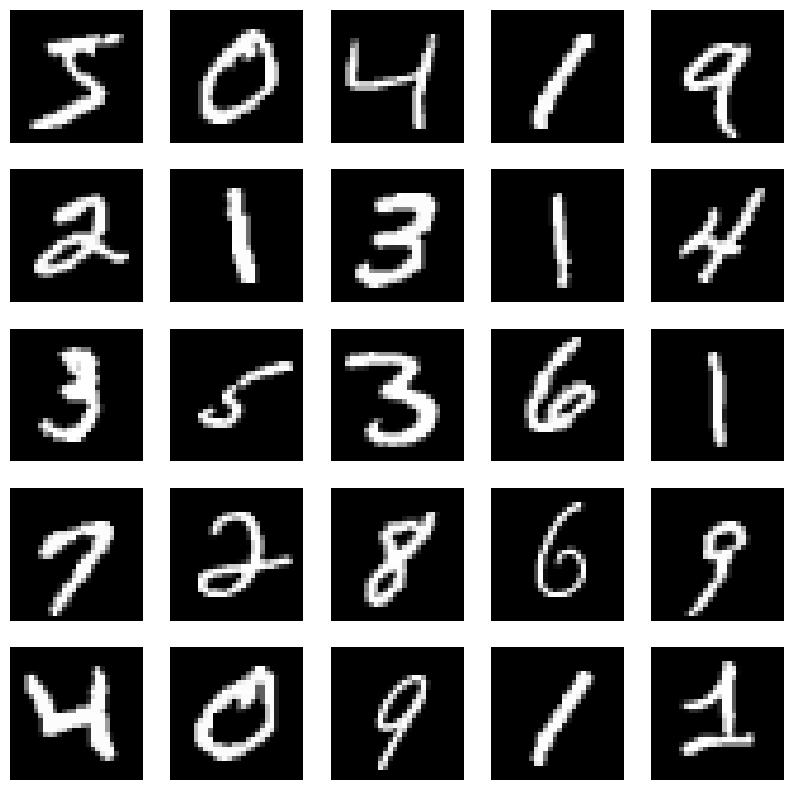

In [6]:
plt.figure(figsize=(10,10))
for n in range(25):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(X_train[n], cmap="gray");
    plt.axis("off")

In [7]:
def visualize_img(data, num):
    plt.figure(figsize=(10,10))
    for n in range(num):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(data[n], cmap="gray");
        plt.axis("off")

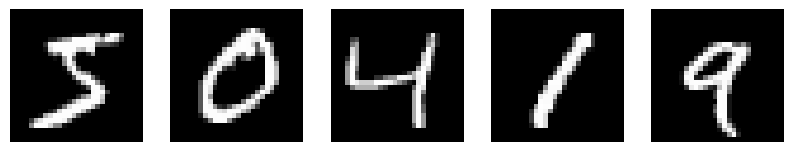

In [8]:
visualize_img(X_train,5)

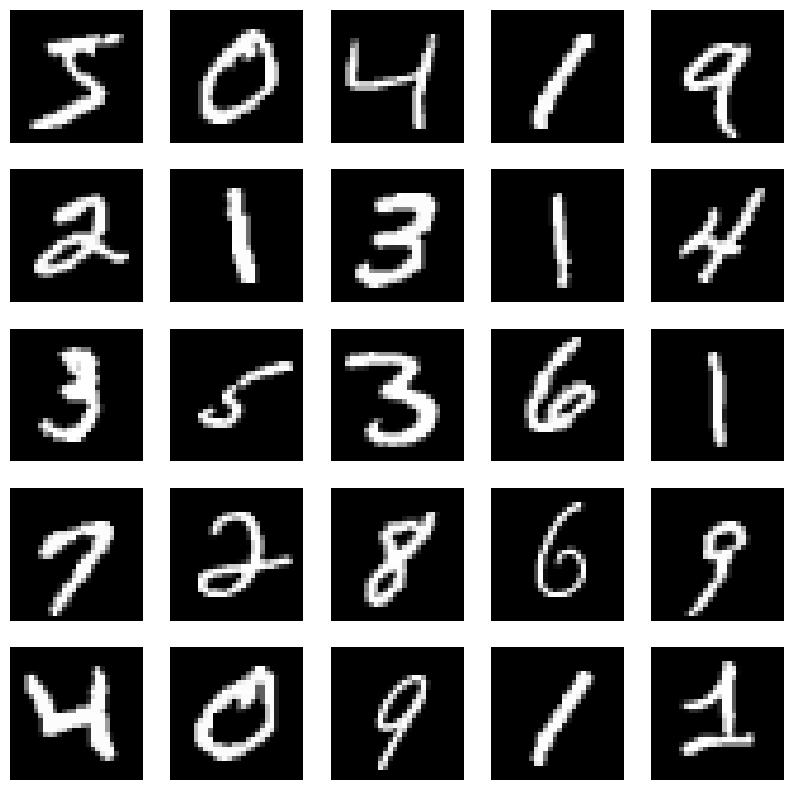

In [9]:
visualize_img(X_train,25)

In [10]:
def visualize_img(data, labels, num):
    plt.figure(figsize=(10,10))
    for n in range(num):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(data[n], cmap="gray")
        plt.axis("off")
        ax.set_title(f"Label: {labels[n]}")  # Görüntü başlığı, 'labels' veri kümesine göre ayarlanıyor
    plt.tight_layout()
    plt.show()

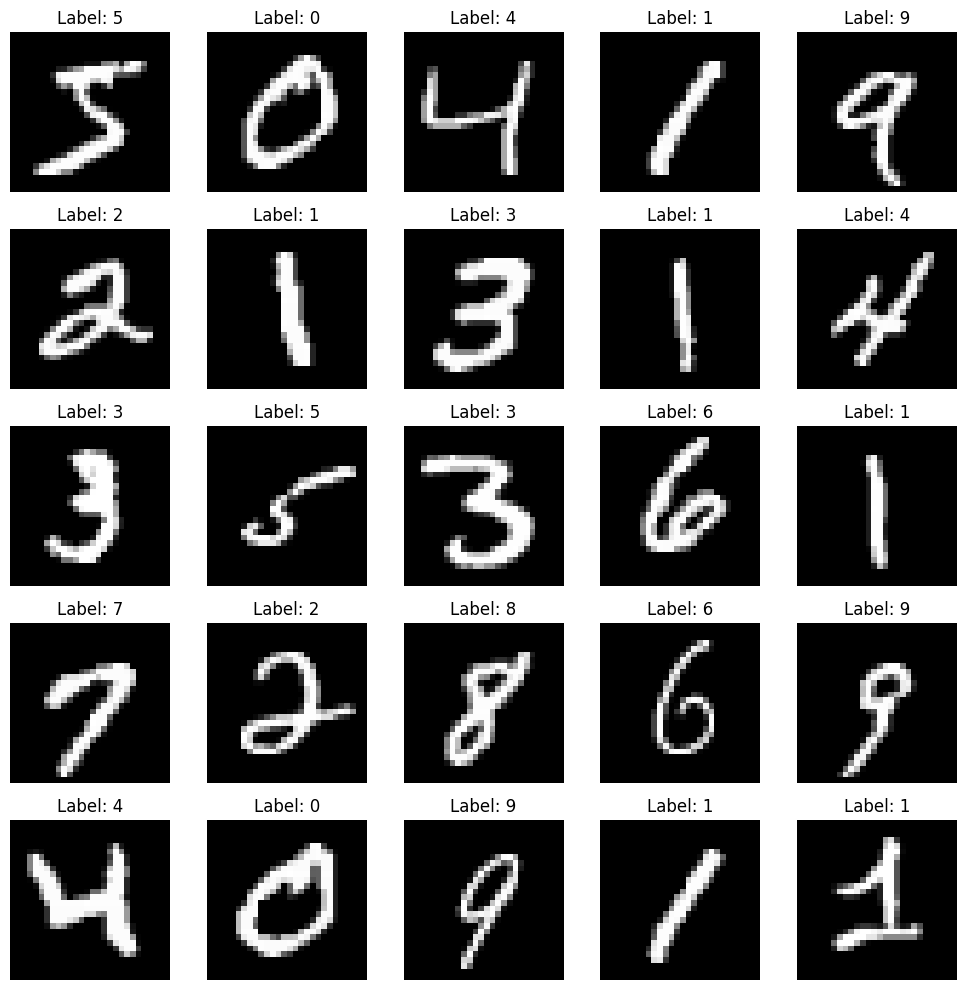

In [11]:
visualize_img(X_train,Y_train,25)

In [12]:
def visualize_img(data, labels, num):
    plt.figure(figsize=(10, 10))
    for n in range(num):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(data[n], cmap="gray")
        plt.axis("off")
        
        # Görselin altına başlık eklemek için annotate kullanıyoruz
        ax.annotate(f"Label: {labels[n]}", 
                    xy=(0.5, -0.1),  # Başlığın konumu (0.5, -0.1), görselin alt merkezine konumlandırır
                    xycoords='axes fraction',
                    ha='center', va='top', fontsize=10, color='black')  # hizalama ve yazı özellikleri
        
    plt.tight_layout()  # Alt grafiklerin birbirine girmesini önlemek için
    plt.show()


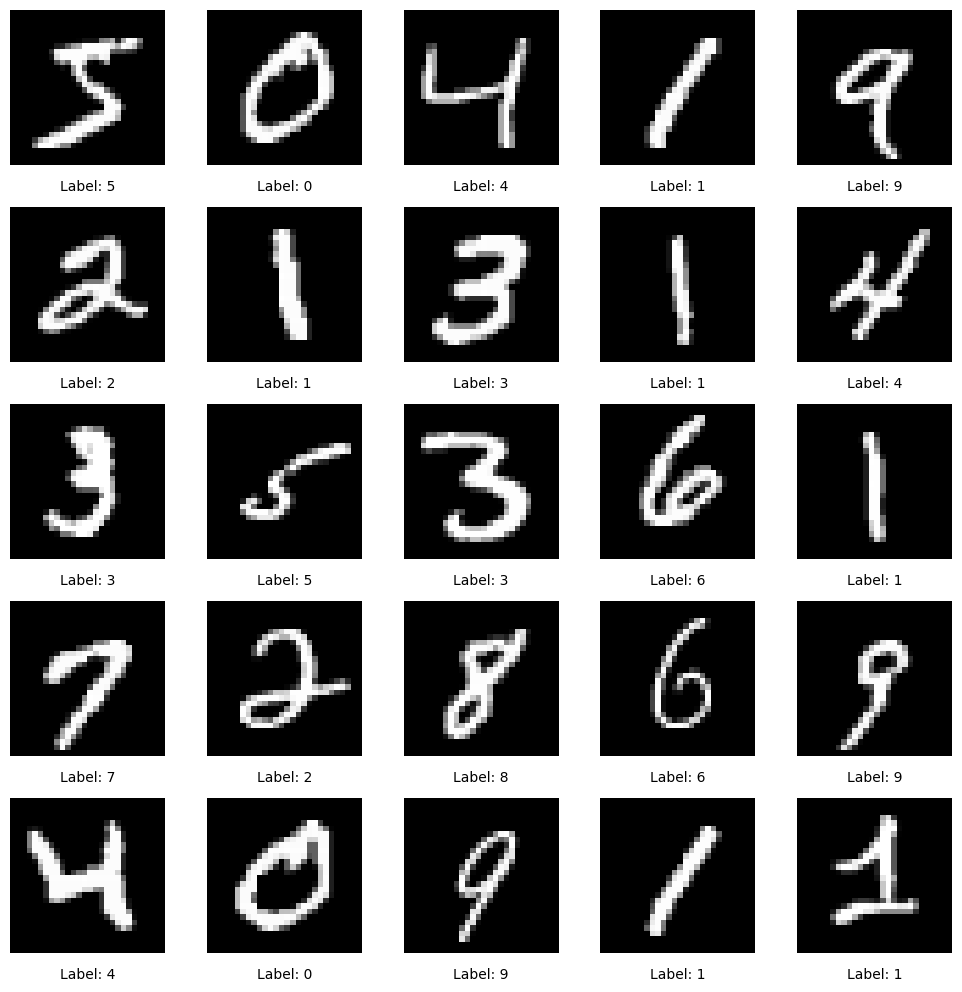

In [13]:
visualize_img(X_train,Y_train, 25)

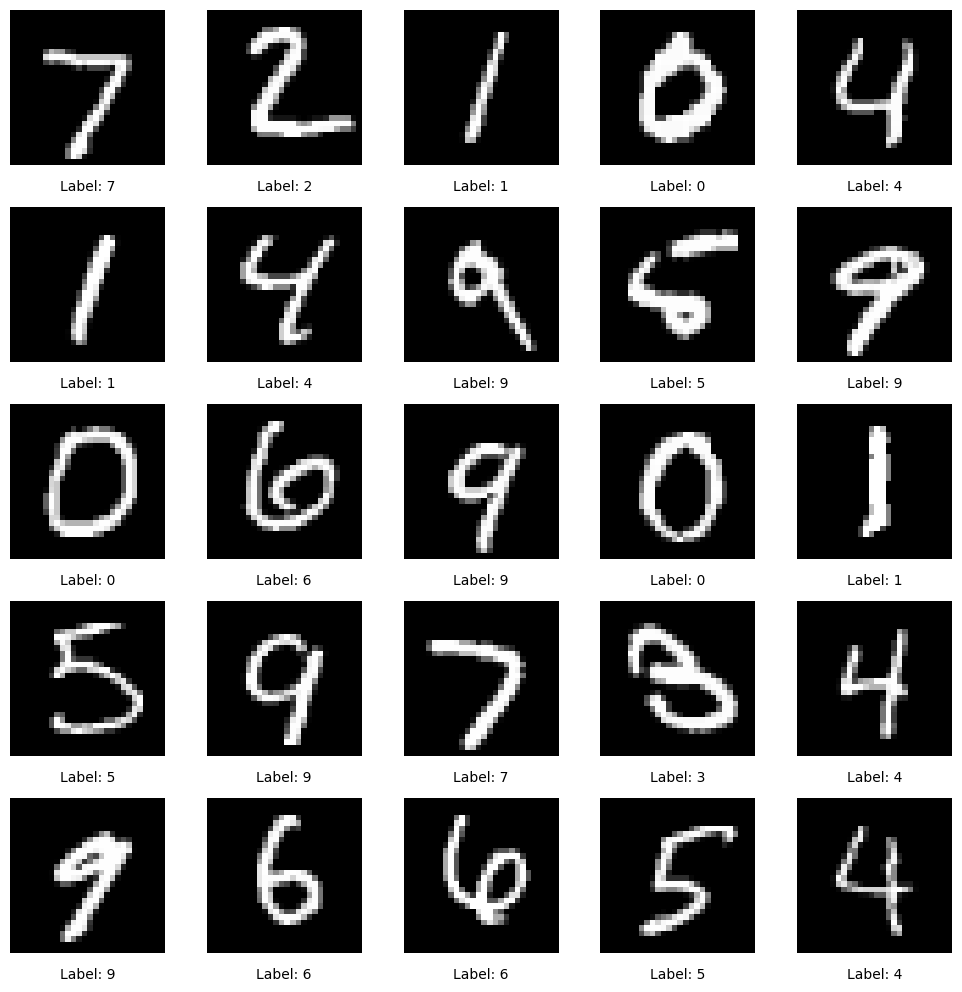

In [14]:
visualize_img(X_test,Y_test, 25)

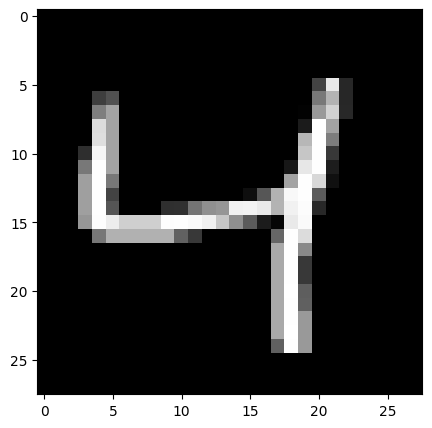

In [15]:
# RGB
plt.figure(figsize=(5,5))
plt.imshow(X_train[2], cmap="gray");
plt.show()

In [16]:
# RGB
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [17]:
X_train[2].shape

(28, 28)

In [18]:
X_train[2][10,20]

254

In [19]:
X_train[2].mean()

24.799744897959183

In [20]:
X_train[2].sum()

19443

In [21]:
X_train[2][14:20, 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [22]:
X_train[2][14:20, 10:20].mean()

96.51666666666667

In [23]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")
    width, height = img.shape
    threshold     = img.max()/2.5

    # yazılar
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        color="white" if img[x][y]<threshold else "black")

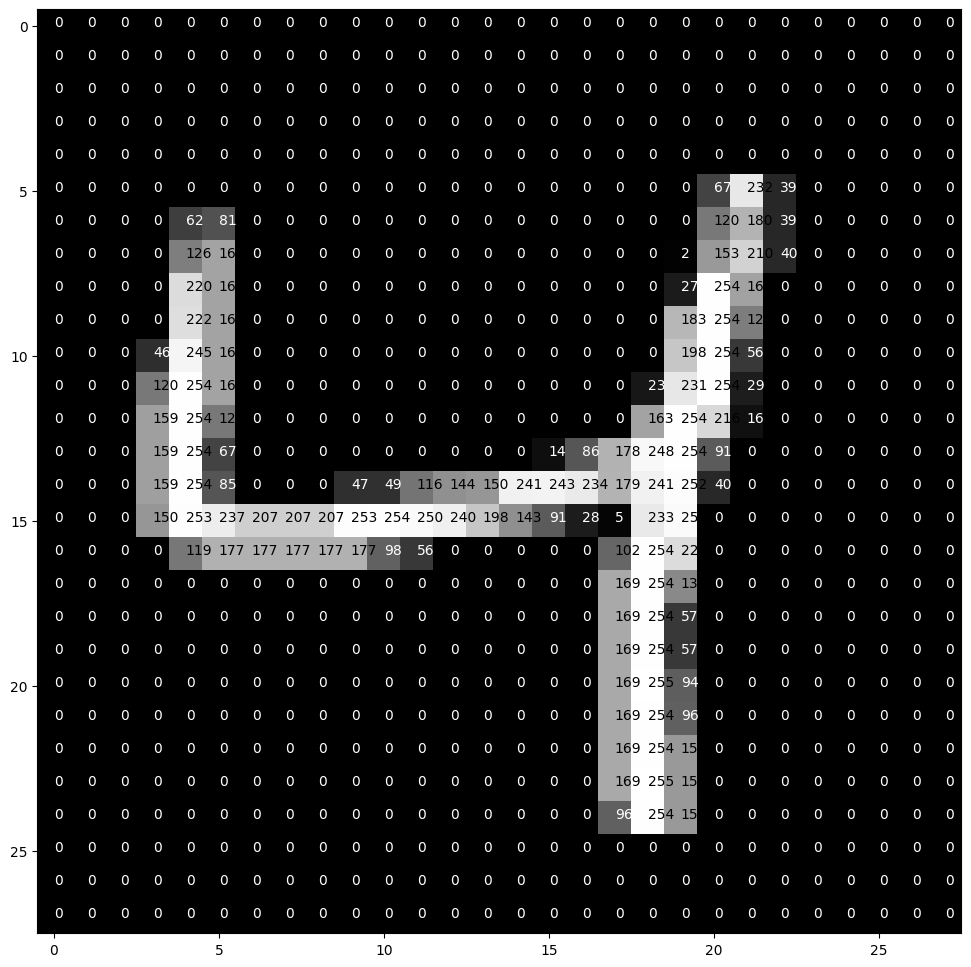

In [24]:
pixel_visualize(X_train[2])

3-) Data Preparation (Veriyi Hazırlamak)

Aşamalar

1-) Bağımlı değişken için encoding işlemi

2-) Elimizdeki veriyi ANN'nin anlayabilmesi için yeniden şekillendirme işlemi

3-) Normalizasyon işlemi ile her bir pixelde yer alan değerleri belirli bir standarta dönüştürme işlemi

1-) Encoding

* önce: [0 1 2 3 4 5 6 7 8 9]
* sonra:[0 0 1 0 0 0 0 0 0 0]

In [25]:
Y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [26]:
Y_train = to_categorical(Y_train)
Y_test  = to_categorical(Y_test)

In [27]:
Y_train[0:5]
# 5 değeri için 01234 6789-->0,  5-->1 olmuş

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

2-) Reshaping

In [28]:
image_size = X_train.shape[1]
image_size

28

In [29]:
print(f"X_train Boyutu: {X_train.shape}")
print(f"X_test Boyutu : {X_test.shape}")

X_train Boyutu: (60000, 28, 28)
X_test Boyutu : (10000, 28, 28)


In [30]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test  = X_test.reshape(X_test.shape[0],28,28,1)

print(f"X_train Boyutu: {X_train.shape}")
print(f"X_test Boyutu : {X_test.shape}")

# 60000 gözlem 28x28 şekil 1-728 pixellerin konumu

X_train Boyutu: (60000, 28, 28, 1)
X_test Boyutu : (10000, 28, 28, 1)


3-) Standardization (by Normalization)

Amaç: 0-255 arası değerleri 0-1 arasına çekmek

Eğitim hızını, performansını ve sürecini arttırmayı sağlar.

In [31]:
X_train = X_train.astype("float32")/255
X_test  = X_test.astype("float32")/255

In [32]:
X_train[5][10,20]

array([0.23529412], dtype=float32)

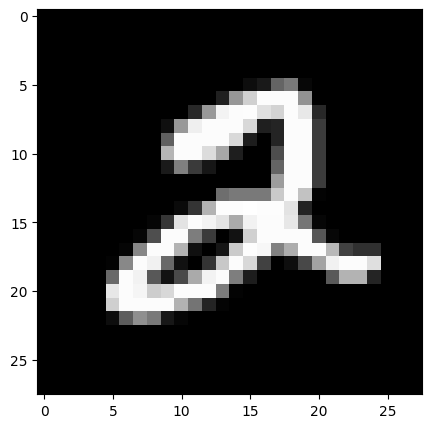

In [33]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[5], cmap="gray");
plt.show()

4-) Modelling (Modelleme)

* Sinir Ağı Mimarisini Tanımlamak

In [34]:
num_labels # unique çıktılar

10

In [35]:
#sinir ağının dış özellikleri
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation="relu",name="layer1"),
    Dense(units=num_labels, activation="softmax", name="output_layer")
    ])

# Sequential: sıralı katman yapıları

#Sinir ağının iç özellikleri
model.compile(loss="categorical_crossentropy", #2'den fazla sınınfta kayıp fonksiyonu
              optimizer="adam",                #bu loss fonksiyonunu optimize/minimize edecek fonksiyon
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"]) #başarıyı değerlendirmek için metricler

In [36]:
model.summary()
# flatten'de 28x28 adet pixel giriyor (784)
# layer1'de 128 tane gireceği yer var 728x128 =100480
# output'de 128'tane hücreden 10 tane hücreye değer gelecek 128*10+ 10 biass (sbt sayı (b0)) =1290


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(X_train,Y_train,epochs=10,batch_size=128,validation_data=(X_test,Y_test))
# batch_size tüm gözlem birimleri her epoch'ta ağırlık güncellemesi için 
# göz önünde bulundurulsun mu yoksa belirli sayıda bir alt küme 
# alınarak mı ağırlık güncellemesi yapılsın. 
# 128 hücrede düzenlenme olacak ve 1 sonraki epoch'a geçilecek.

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8318 - loss: 0.6127 - precision: 0.9337 - recall: 0.7028 - val_accuracy: 0.9468 - val_loss: 0.1857 - val_precision: 0.9593 - val_recall: 0.9340
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9490 - loss: 0.1757 - precision: 0.9627 - recall: 0.9377 - val_accuracy: 0.9595 - val_loss: 0.1309 - val_precision: 0.9690 - val_recall: 0.9528
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1188 - precision: 0.9740 - recall: 0.9593 - val_accuracy: 0.9672 - val_loss: 0.1071 - val_precision: 0.9747 - val_recall: 0.9612
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0905 - precision: 0.9790 - recall: 0.9688 - val_accuracy: 0.9723 - val_loss: 0.0897 - val_precision: 0.9773 - val_recall: 0.9674
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9798 - loss: 0.0713 - precision: 0.9835 - recall: 0.9760 - val_accuracy: 0.9750 - val_loss: 0.

5-) Evaluation (Model Başarısının Değerlendirilmesi)

In [38]:
history = model.fit(X_train,Y_train,epochs=10,batch_size=128,validation_data=(X_test,Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9941 - loss: 0.0230 - precision: 0.9955 - recall: 0.9934 - val_accuracy: 0.9761 - val_loss: 0.0735 - val_precision: 0.9786 - val_recall: 0.9741
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9956 - loss: 0.0196 - precision: 0.9961 - recall: 0.9947 - val_accuracy: 0.9771 - val_loss: 0.0726 - val_precision: 0.9791 - val_recall: 0.9756
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9963 - loss: 0.0169 - precision: 0.9969 - recall: 0.9957 - val_accuracy: 0.9776 - val_loss: 0.0738 - val_precision: 0.9797 - val_recall: 0.9762
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9968 - loss: 0.0142 - precision: 0.9972 - recall: 0.9961 - val_accuracy: 0.9776 - val_loss: 0.0735 - val_precision: 0.9797 - val_recall: 0.9764
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9971 - loss: 0.0126 - precision: 0.9975 - recall: 0.9967 - val_accuracy: 0.9769 - val_loss: 0.

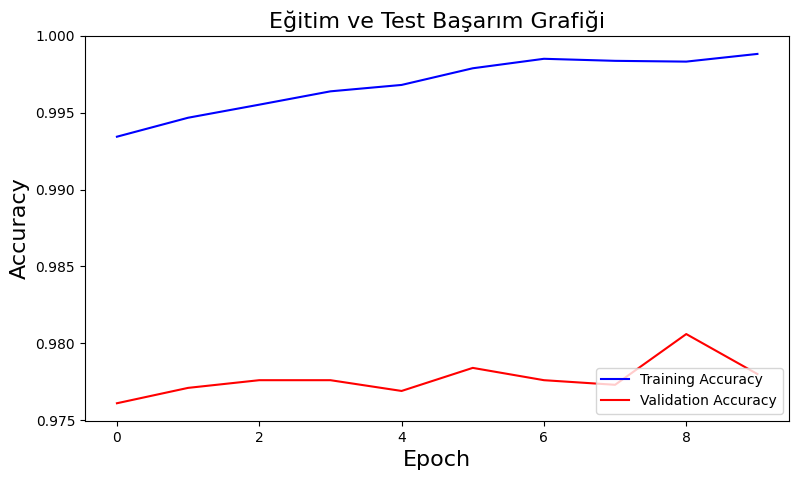

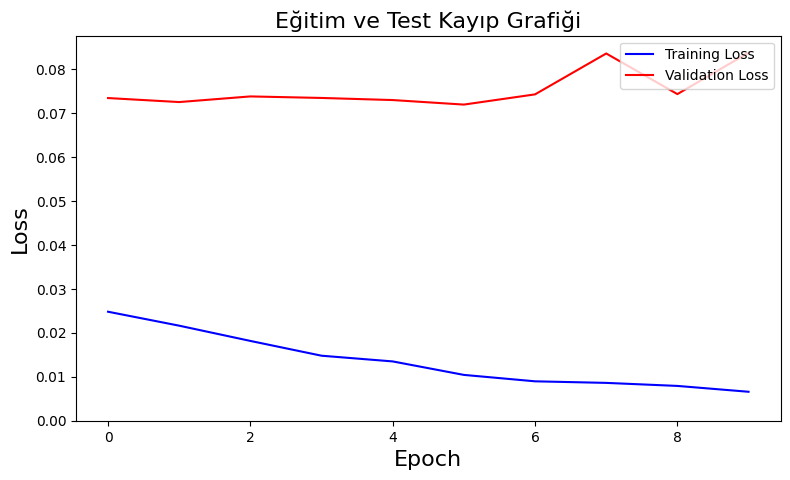

In [39]:
###############################
# Accuracy ve Loss Grafikleri #
###############################

#------------------Grafik 1 Accuracy------------------
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], color="b", label="Training Accuracy")
plt.plot(history.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title("Eğitim ve Test Başarım Grafiği", fontsize=16)
#------------------Grafik 2 Loss------------------
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"], color="b", label="Training Loss")
plt.plot(history.history["val_loss"], color="r", label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Eğitim ve Test Kayıp Grafiği", fontsize=16)
plt.show()

In [40]:
loss, precision, recall, acc = model.evaluate(X_test, Y_test, verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0*acc))
print("\nTest Loss: %.1f%%" % (100.0*loss))
print("\nTest Precision: %.1f%%" % (100.0*precision))
print("\nTest Recall: %.1f%%" % (100.0*recall))

# precission: model ile örneğin 1 olarak tahmin ettiğimiz değerlerin gerçekten de 1 olup olmadığının başarısı
# recall    : gerçek değerlerin kaç tanesi doğru tahmin edildi. 


# precission: tahminlerin kaçı gerçek değerlerle aynı?
# recall    : gerçeklerin kaçı doğru tahmin edildi?



Test Accuracy: 97.8%

Test Loss: 8.4%

Test Precision: 97.9%

Test Recall: 97.7%


6-) Modelin Kaydedilmesi ve Tahmin İçin Kullanılması

In [41]:
model.save("mnist_model.h5") #h5 dosya formatı

In [42]:
import random

random = random.randint(0, X_test.shape[0])
random

2732

In [43]:
test_image = X_test[random]
Y_test[random]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

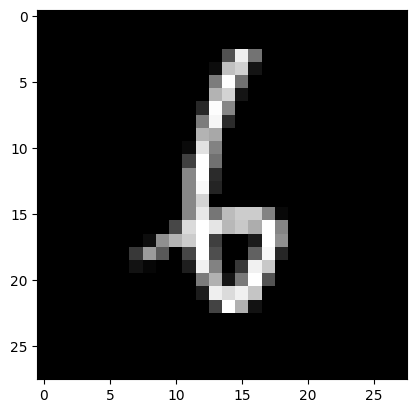

In [44]:
plt.imshow(test_image.reshape(28,28), cmap="gray");

In [45]:
#model tahmin

test_data = X_test[random].reshape(1,28,28,1)

In [46]:
probability = model.predict(test_data)
probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[1.8348853e-06, 3.4619006e-07, 4.9459013e-06, 2.3484513e-07,
        4.7834310e-05, 1.4471400e-03, 9.9838376e-01, 2.4317784e-10,
        1.1386805e-04, 3.0681224e-10]], dtype=float32)

In [47]:
predicted_classes = np.argmax(probability)
predicted_classes

6

In [49]:
print(f"Tahmin Edilen Sınıf: {predicted_classes} \n")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri:{(np.max(probability,axis=-1))[0]}\n")
print(f"Diğer Sınıfların Olasılık Değerleri: \n {probability}")


Tahmin Edilen Sınıf: 6 

Tahmin Edilen Sınıfın Olasılık Değeri:0.9983837604522705

Diğer Sınıfların Olasılık Değerleri: 
 [[1.8348853e-06 3.4619006e-07 4.9459013e-06 2.3484513e-07 4.7834310e-05
  1.4471400e-03 9.9838376e-01 2.4317784e-10 1.1386805e-04 3.0681224e-10]]
